In [78]:
import pandas as pd
import numpy as np
import datetime
import re
import os
import multiprocessing
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [59]:
#validates the date
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d')
        return True
    except ValueError:
        return False

In [60]:
def readic(filename):
    #read the csv file for ice coverage
    train = pd.read_csv(filename)
    # get rid of the last two columns as they are repetead
    train = train.iloc[:, 0:50]
    #rename the days column and make it index
    temp = train.columns.values
    temp[0] = 'days'
    train.columns = temp
    train.set_index('days')
    #get rid of the bottom nan rows
    nrows = train.shape[0]
    bot_bound = nrows-10
    for i in range(bot_bound, nrows):
        if type(train.iloc[i]['days']) == float:
            print(i)
            train.drop(range(i,nrows),inplace=True)
            break
    return train  

In [61]:
ice_coverage = readic('mic.csv')

200


In [62]:
monly_score = pd.read_csv('miHuron1918.csv',skiprows=2)

In [63]:
#monly_score.head()

In [64]:
#ice_coverage.drop(columns='jday')

In [65]:
'''
train=pd.read_csv('miHuron1918.csv')
# this is for auto process, ignore for now
start = 0
for i in range(0, train.shape[0]):
    if type(train.iloc[i,4]) == str:
        start = i-1
        break
print(start)
'''

"\ntrain=pd.read_csv('miHuron1918.csv')\n# this is for auto process, ignore for now\nstart = 0\nfor i in range(0, train.shape[0]):\n    if type(train.iloc[i,4]) == str:\n        start = i-1\n        break\nprint(start)\n"

In [66]:
#datelist = pd.date_range()

In [67]:
#create a date array consisting everyday from 1918.1.1 to today
today = datetime.datetime.today().date()
base = datetime.date(1918, 1, 1)
delta = today - base
date_list = [base + datetime.timedelta(days=x) for x in range(0, delta.days)]

In [68]:
date_list[1]

datetime.date(1918, 1, 2)

In [69]:
#month dictionary, 1 for jan, 2 for feb...
month_dic = ['nan','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [70]:
date_list[37087]

datetime.date(2019, 7, 17)

In [71]:
daily_score = np.empty(delta.days)
daily_score[:] = np.nan
for i in range(0,delta.days):
    cur_year = date_list[i].year
    cur_mon = date_list[i].month
    cur_score = monly_score.iloc[cur_year-1918][month_dic[cur_mon]]
    daily_score[i] = cur_score

In [72]:
#read in ord, ugn, dugn data
ord_data = pd.read_csv('1958-11-01-2018-12-31ord.csv')
ugn_data = pd.read_csv('1989-04-21-2018-12-31ugn.csv')
noh_data = pd.read_csv('1923-01-01-2002-07-31noh.csv')

In [73]:
#convert the date into datetime
ord_data['Date']= pd.to_datetime(ord_data['Date']) 
ugn_data['Date']= pd.to_datetime(ugn_data['Date']) 
noh_data['Date']= pd.to_datetime(noh_data['Date']) 
ugn_date_list = ugn_data['Date'].dt.date
ord_date_list = ord_data['Date'].dt.date
noh_date_list = noh_data['Date'].dt.date

In [74]:
#create two series, reshaped_ic containing the daily ice coverage data and reshaped_dates cotaining 
#corresponding dates
reshaped_ic = pd.Series([])
ic_days = ice_coverage['days']
reshaped_dates = pd.Series([])
for i in range(1973,2020):
    #print(ice_coverage[str(i)])
    reshaped_ic = reshaped_ic.append(ice_coverage[str(i)],ignore_index=True)
    reshaped_dates = reshaped_dates.append(ic_days+'-'+str(i),ignore_index=True)
reshaped_dates = pd.to_datetime(reshaped_dates, errors='coerce')
reshaped_dates = reshaped_dates.dt.date

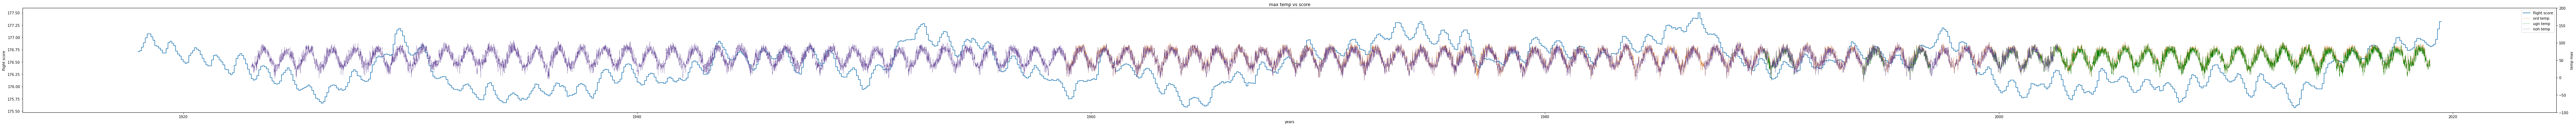

In [76]:
#plot the temperature max data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['max'],color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['max'],color = 'green',linewidth = 0.4, label = 'ugn temp')
axes2.plot(noh_date_list, noh_data['Tmax'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('temp max')
axes2.set_ylim([-100,200])
axes1.title.set_text('max temp vs score')
fig.tight_layout()
fig.savefig('maxtemp_visulization.png')
fig.show()

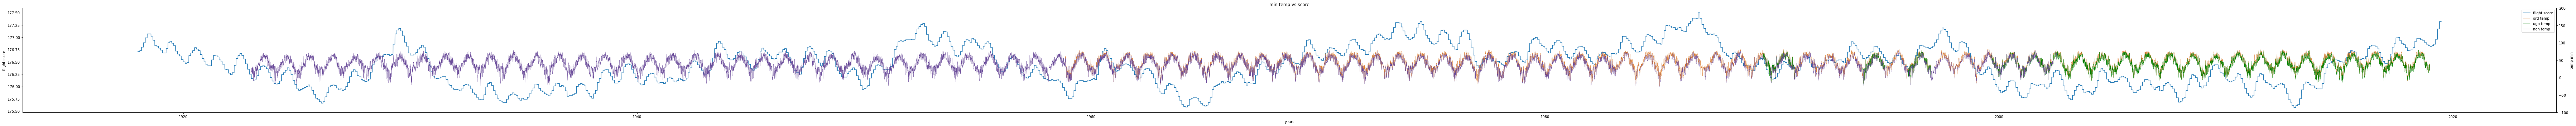

In [77]:
#plot the temperature min data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['min'],color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['min'],color = 'green',linewidth = 0.4, label = 'ugn temp')
axes2.plot(noh_date_list, noh_data['Tmin'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('temp min')
axes2.set_ylim([-100,200])
axes1.title.set_text('min temp vs score')
fig.tight_layout()
fig.savefig('mintemp_visulization.png')
fig.show()

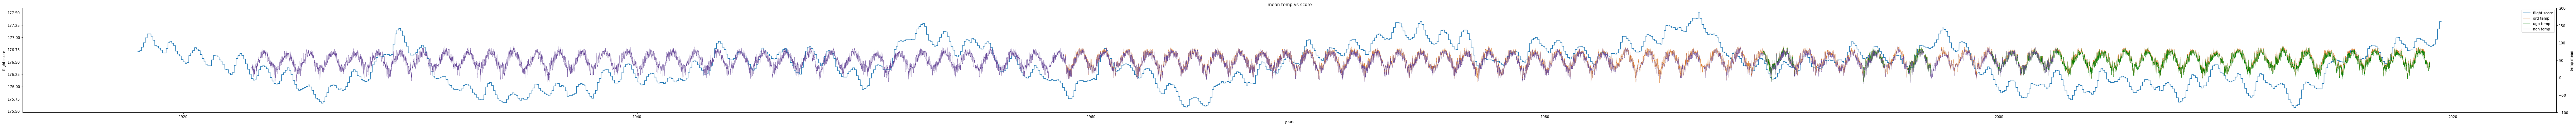

In [40]:
#plot the temperature mean data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['mean'],color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['mean'],color = 'green',linewidth = 0.4, label = 'ugn temp')
axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('temp mean')
axes2.set_ylim([-100,200])
axes1.title.set_text('mean temp vs score')
fig.tight_layout()
fig.savefig('meantemp_visulization.png')
fig.show()

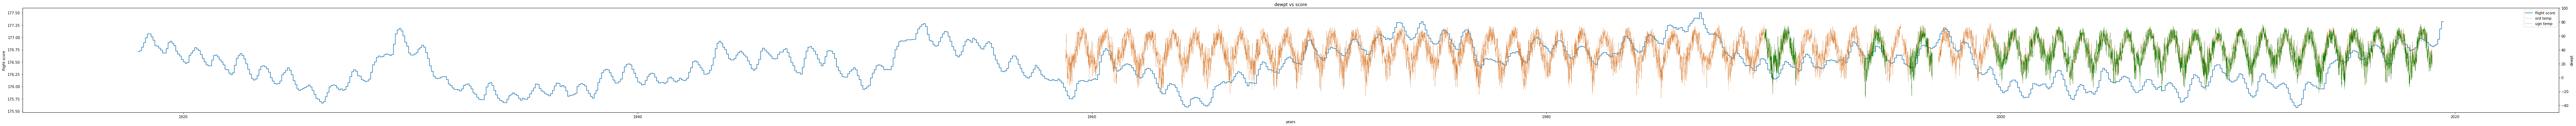

In [41]:
#plot the dewpt data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['dewpt'],color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['dewpt'],color = 'green',linewidth = 0.4, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('dewpt')
axes2.set_ylim([-50,100])
axes1.title.set_text('dewpt vs score')
fig.tight_layout()
fig.savefig('dewpt_visulization.png')
fig.show()

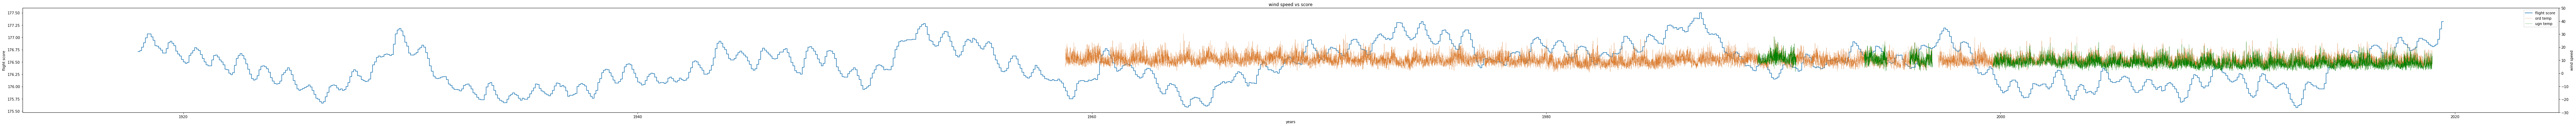

In [42]:
#plot the wind speed data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['windS'],color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['windS'],color = 'green',linewidth = 0.4, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('wind speed')
axes2.set_ylim([-30,50])
axes1.title.set_text('wind speed vs score')
fig.tight_layout()
fig.savefig('windspeed_visulization.png')
fig.show()

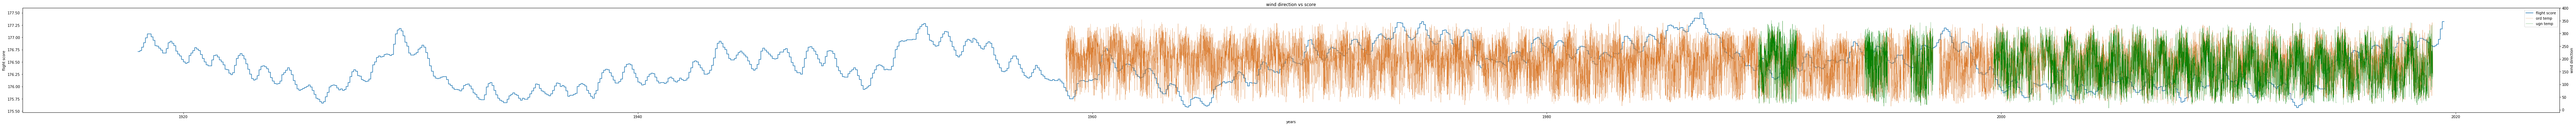

In [43]:
#plot the wind direction data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['windD'],color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['windD'],color = 'green',linewidth = 0.4, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('wind direction')
axes2.set_ylim([-10,400])
axes1.title.set_text('wind direction vs score')
fig.tight_layout()
fig.savefig('winddirection_visulization.png')
fig.show()

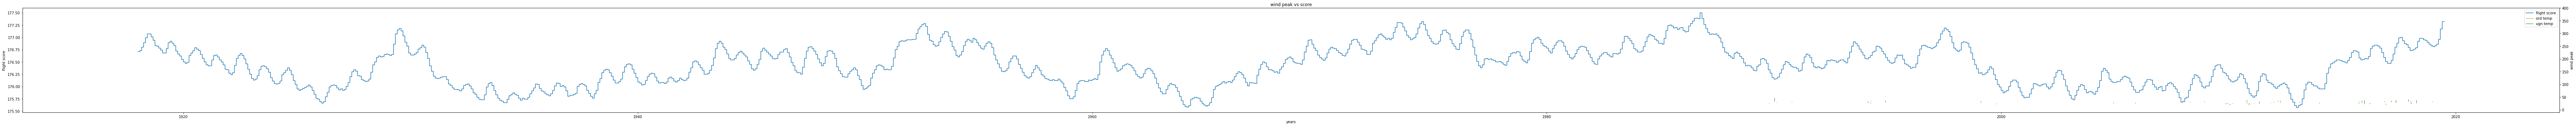

In [44]:
#plot the wind peak data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['peak'],color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['peak'],color = 'green',linewidth = 1, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('wind peak')
axes2.set_ylim([-10,400])
axes1.title.set_text('wind peak vs score')
fig.tight_layout()
fig.savefig('windpeak_visulization.png')
fig.show()

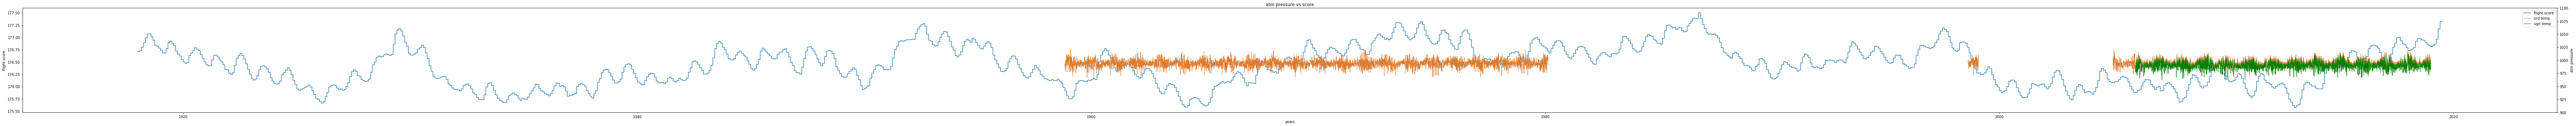

In [45]:
#plot the atm pressure data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['atm'],color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['atm'],color = 'green',linewidth = 1, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('atm pressure')
axes2.set_ylim([900,1100])
axes1.title.set_text('atm pressure vs score')
fig.tight_layout()
fig.savefig('atmpressure_visulization.png')
fig.show()

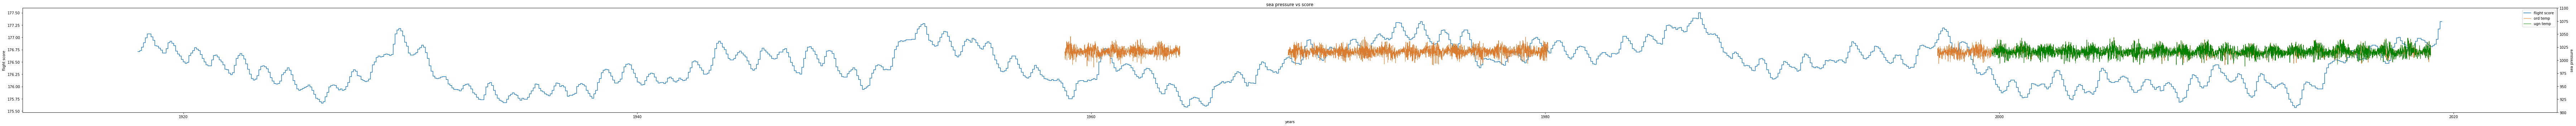

In [46]:
#plot the sea pressure data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['sea'],color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['sea'],color = 'green',linewidth = 1, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('sea pressure')
axes2.set_ylim([900,1100])
axes1.title.set_text('sea pressure vs score')
fig.tight_layout()
fig.savefig('seapressure_visulization.png')
fig.show()

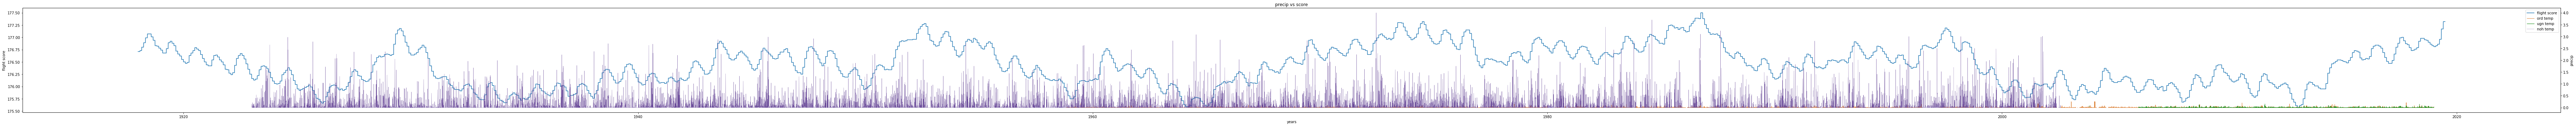

In [47]:
#plot the precip data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_data['precip'],color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_data['precip'],color = 'green',linewidth = 1, label = 'ugn temp')
axes2.plot(noh_date_list, noh_data['precip'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('precip')
#axes2.set_ylim([900,1100])
axes1.title.set_text('precip vs score')
fig.tight_layout()
fig.savefig('precip_visulization.png')
fig.show()

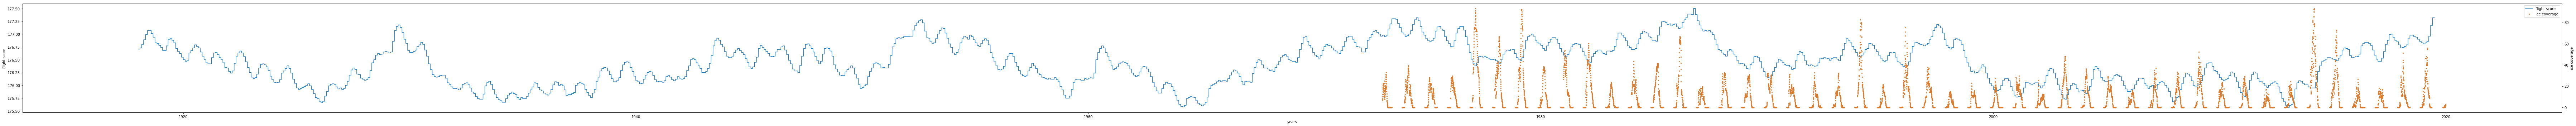

In [48]:
#plot the ice coverage data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.scatter(reshaped_dates, reshaped_ic ,color = '#DA7C30',s=5, label = 'ice coverage')
#axes2.plot(reshaped_dates, reshaped_ic ,color = '#DA7C30', label = 'ice coverage')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('ice coverage')
#axes2.set_ylim([900,1100])
fig.tight_layout()
fig.savefig('icecoverage_visulization.png')
fig.show()

In [49]:
#calculate the ord deltas for 8 features

#####max
num_data_ord = len(ord_data['max'])
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['max'][0]
new_data[1:num_data_ord] = ord_data['max'][0:num_data_ord-1]
ord_max_delta = ord_data['max'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_max_delta],axis =1)
temp.columns = ['Date', 'max']
temp.to_csv( 'delta_max_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####min
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['min'][0]
new_data[1:num_data_ord] = ord_data['min'][0:num_data_ord-1]
ord_min_delta = ord_data['min'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_min_delta],axis =1)
temp.columns = ['Date', 'min']
temp.to_csv( 'delta_min_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)


#####mean
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['mean'][0]
new_data[1:num_data_ord] = ord_data['mean'][0:num_data_ord-1]
ord_mean_delta = ord_data['mean'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_mean_delta],axis =1)
temp.columns = ['Date', 'mean']
temp.to_csv( 'delta_mean_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####dewpt
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['dewpt'][0]
new_data[1:num_data_ord] = ord_data['dewpt'][0:num_data_ord-1]
ord_dewpt_delta = ord_data['dewpt'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_dewpt_delta],axis =1)
temp.columns = ['Date', 'dewpt']
temp.to_csv( 'delta_dewpt_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####windS
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['windS'][0]
new_data[1:num_data_ord] = ord_data['windS'][0:num_data_ord-1]
ord_windS_delta = ord_data['windS'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_windS_delta],axis =1)
temp.columns = ['Date', 'windS']
temp.to_csv( 'delta_windS_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####windD
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['windD'][0]
new_data[1:num_data_ord] = ord_data['windD'][0:num_data_ord-1]
ord_windD_delta = ord_data['windD'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_windD_delta],axis =1)
temp.columns = ['Date', 'windD']
temp.to_csv( 'delta_windD_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####peak
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['peak'][0]
new_data[1:num_data_ord] = ord_data['peak'][0:num_data_ord-1]
ord_peak_delta = ord_data['peak'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_peak_delta],axis =1)
temp.columns = ['Date', 'peak']
temp.to_csv( 'delta_peak_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####atm
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['atm'][0]
new_data[1:num_data_ord] = ord_data['atm'][0:num_data_ord-1]
ord_atm_delta = ord_data['atm'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_atm_delta],axis =1)
temp.columns = ['Date', 'atm']
temp.to_csv( 'delta_atm_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####sea
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['sea'][0]
new_data[1:num_data_ord] = ord_data['sea'][0:num_data_ord-1]
ord_sea_delta = ord_data['sea'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_sea_delta],axis =1)
temp.columns = ['Date', 'sea']
temp.to_csv( 'delta_sea_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####precip
new_data = pd.Series(np.zeros(num_data_ord))
new_data[0] = ord_data['precip'][0]
new_data[1:num_data_ord] = ord_data['precip'][0:num_data_ord-1]
ord_precip_delta = ord_data['precip'] - new_data

# export to csv
temp = pd.concat([ord_date_list, ord_precip_delta],axis =1)
temp.columns = ['Date', 'precip']
temp.to_csv( 'delta_precip_ord.csv',encoding='utf-8',na_rep = float('nan'),index = False)

In [50]:
#calculate the ugn deltas for 8 features
num_data_ugn = len(ugn_data['max'])
#####max
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['max'][0]
new_data[1:num_data_ugn] = ugn_data['max'][0:num_data_ugn-1]
ugn_max_delta = ugn_data['max'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_max_delta],axis =1)
temp.columns = ['Date', 'max']
temp.to_csv( 'delta_max_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####min
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['min'][0]
new_data[1:num_data_ugn] = ugn_data['min'][0:num_data_ugn-1]
ugn_min_delta = ugn_data['min'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_min_delta],axis =1)
temp.columns = ['Date', 'min']
temp.to_csv( 'delta_min_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)


#####mean
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['mean'][0]
new_data[1:num_data_ugn] = ugn_data['mean'][0:num_data_ugn-1]
ugn_mean_delta = ugn_data['mean'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_mean_delta],axis =1)
temp.columns = ['Date', 'mean']
temp.to_csv( 'delta_mean_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####dewpt
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['dewpt'][0]
new_data[1:num_data_ugn] = ugn_data['dewpt'][0:num_data_ugn-1]
ugn_dewpt_delta = ugn_data['dewpt'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_dewpt_delta],axis =1)
temp.columns = ['Date', 'dewpt']
temp.to_csv( 'delta_dewpt_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####windS
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['windS'][0]
new_data[1:num_data_ugn] = ugn_data['windS'][0:num_data_ugn-1]
ugn_windS_delta = ugn_data['windS'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_windS_delta],axis =1)
temp.columns = ['Date', 'windS']
temp.to_csv( 'delta_windS_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####windD
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['windD'][0]
new_data[1:num_data_ugn] = ugn_data['windD'][0:num_data_ugn-1]
ugn_windD_delta = ugn_data['windD'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_windD_delta],axis =1)
temp.columns = ['Date', 'windD']
temp.to_csv( 'delta_windD_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####peak
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['peak'][0]
new_data[1:num_data_ugn] = ugn_data['peak'][0:num_data_ugn-1]
ugn_peak_delta = ugn_data['peak'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_peak_delta],axis =1)
temp.columns = ['Date', 'peak']
temp.to_csv( 'delta_peak_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####atm
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['atm'][0]
new_data[1:num_data_ugn] = ugn_data['atm'][0:num_data_ugn-1]
ugn_atm_delta = ugn_data['atm'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_atm_delta],axis =1)
temp.columns = ['Date', 'atm']
temp.to_csv( 'delta_atm_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####sea
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['sea'][0]
new_data[1:num_data_ugn] = ugn_data['sea'][0:num_data_ugn-1]
ugn_sea_delta = ugn_data['sea'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_sea_delta],axis =1)
temp.columns = ['Date', 'sea']
temp.to_csv( 'delta_sea_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####precip
new_data = pd.Series(np.zeros(num_data_ugn))
new_data[0] = ugn_data['precip'][0]
new_data[1:num_data_ugn] = ugn_data['precip'][0:num_data_ugn-1]
ugn_precip_delta = ugn_data['precip'] - new_data

# export to csv
temp = pd.concat([ugn_date_list, ugn_precip_delta],axis =1)
temp.columns = ['Date', 'precip']
temp.to_csv( 'delta_precip_ugn.csv',encoding='utf-8',na_rep = float('nan'),index = False)

In [51]:
#noh data
num_data_noh = len(noh_data['precip'])
#####precip
new_data = pd.Series(np.zeros(num_data_noh))
new_data[0] = noh_data['precip'][0]
new_data[1:num_data_noh] = noh_data['precip'][0:num_data_noh-1]
noh_precip_delta = noh_data['precip'] - new_data

# export to csv
temp = pd.concat([noh_date_list, noh_precip_delta],axis =1)
temp.columns = ['Date', 'precip']
temp.to_csv( 'delta_precip_noh.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####tmax
new_data = pd.Series(np.zeros(num_data_noh))
new_data[0] = noh_data['Tmax'][0]
new_data[1:num_data_noh] = noh_data['Tmax'][0:num_data_noh-1]
noh_max_delta = noh_data['Tmax'] - new_data

# export to csv
temp = pd.concat([noh_date_list, noh_max_delta],axis =1)
temp.columns = ['Date', 'max']
temp.to_csv( 'delta_max_noh.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####tmin
new_data = pd.Series(np.zeros(num_data_noh))
new_data[0] = noh_data['Tmin'][0]
new_data[1:num_data_noh] = noh_data['Tmin'][0:num_data_noh-1]
noh_min_delta = noh_data['Tmin'] - new_data

# export to csv
temp = pd.concat([noh_date_list, noh_min_delta],axis =1)
temp.columns = ['Date', 'min']
temp.to_csv( 'delta_min_noh.csv',encoding='utf-8',na_rep = float('nan'),index = False)

#####tmean
new_data = pd.Series(np.zeros(num_data_noh))
new_data[0] = noh_data['Tmean'][0]
new_data[1:num_data_noh] = noh_data['Tmean'][0:num_data_noh-1]
noh_mean_delta = noh_data['Tmean'] - new_data

# export to csv
temp = pd.concat([noh_date_list, noh_mean_delta],axis =1)
temp.columns = ['Date', 'mean']
temp.to_csv( 'delta_mean_noh.csv',encoding='utf-8',na_rep = float('nan'),index = False)

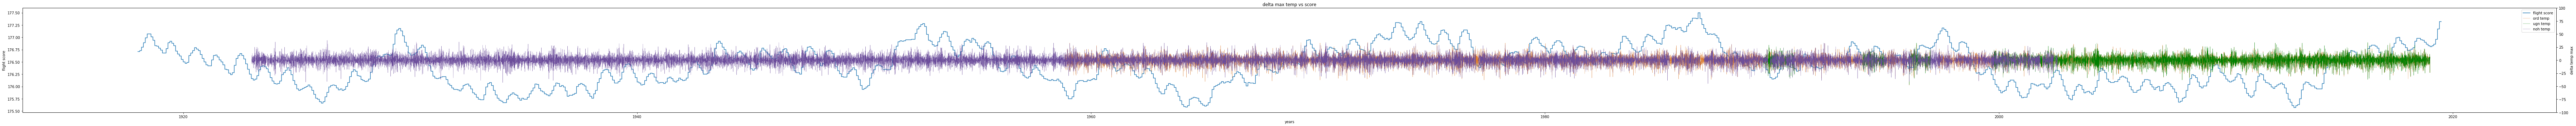

In [53]:
#graph delta
#plot the delta temperature max data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_max_delta,color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_max_delta,color = 'green',linewidth = 0.4, label = 'ugn temp')
axes2.plot(noh_date_list, noh_max_delta,color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta temp max')
axes2.set_ylim([-100,100])
axes1.title.set_text('delta max temp vs score')

fig.tight_layout()
fig.savefig('delta_maxtemp_visulization.png')
fig.show()

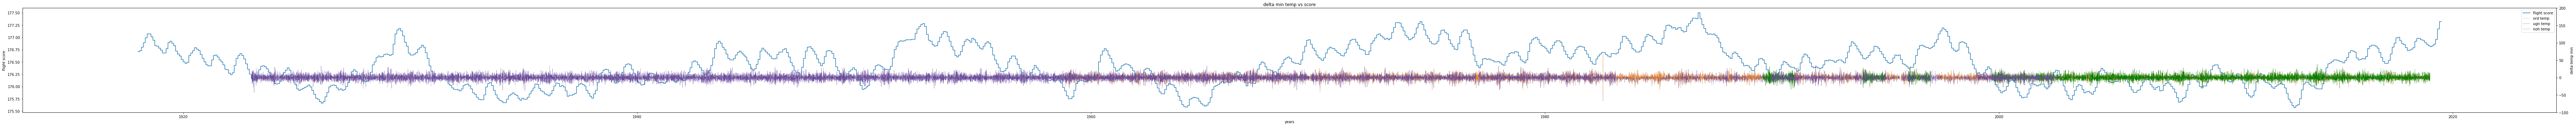

In [55]:
#plot the delta temperature min data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_min_delta,color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_min_delta,color = 'green',linewidth = 0.4, label = 'ugn temp')
axes2.plot(noh_date_list, noh_min_delta,color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta temp min')
axes2.set_ylim([-100,200])
axes1.title.set_text('delta min temp vs score')
fig.tight_layout()
#fig.show()
fig.savefig('delta_mintemp_visulization.png')
fig.show()

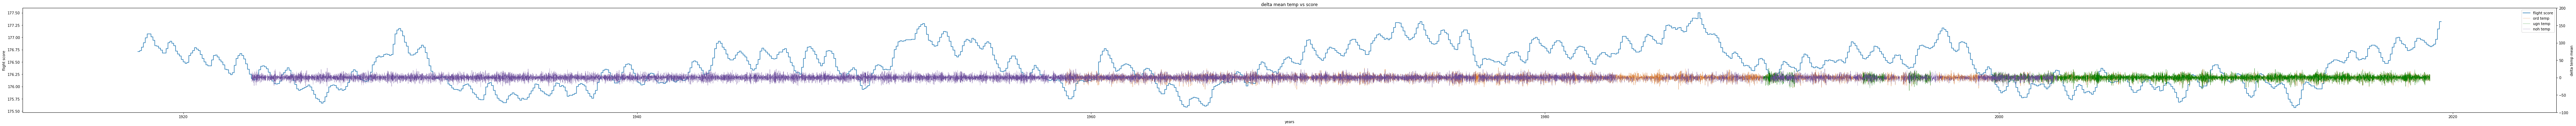

In [56]:
#plot the delta temperature mean data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_mean_delta,color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_mean_delta,color = 'green',linewidth = 0.4, label = 'ugn temp')
axes2.plot(noh_date_list, noh_mean_delta,color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta temp mean')
axes2.set_ylim([-100,200])
axes1.title.set_text('delta mean temp vs score')
fig.tight_layout()
fig.savefig('delta_meantemp_visulization.png')
fig.show()

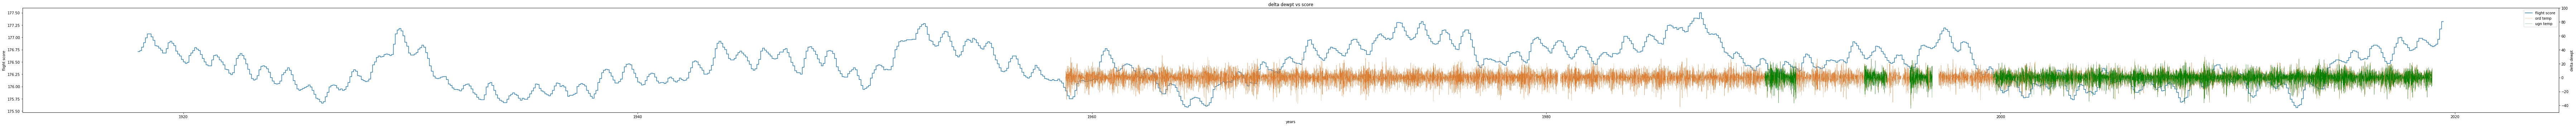

In [57]:
#plot the delta dewpt data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_dewpt_delta,color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_dewpt_delta,color = 'green',linewidth = 0.4, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta dewpt')
axes2.set_ylim([-50,100])
axes1.title.set_text('delta dewpt vs score')
fig.tight_layout()
fig.savefig('delta_dewpt_visulization.png')
fig.show()

In [28]:
#plot the delta wind speed data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_windS_delta,color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_windS_delta,color = 'green',linewidth = 0.4, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta wind speed')
axes2.set_ylim([-30,50])
axes1.title.set_text('delta wind speed vs score')
fig.tight_layout()
fig.savefig('delta_windspeed_visulization.png')
fig.show()

In [29]:
#plot the delta wind direction data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_windD_delta,color = '#DA7C30',linewidth = 0.4, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_windD_delta,color = 'green',linewidth = 0.4, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta wind direction')
axes2.set_ylim([-10,400])
axes1.title.set_text('delta wind direction vs score')
fig.tight_layout()
fig.savefig('delta_winddirection_visulization.png')
fig.show()

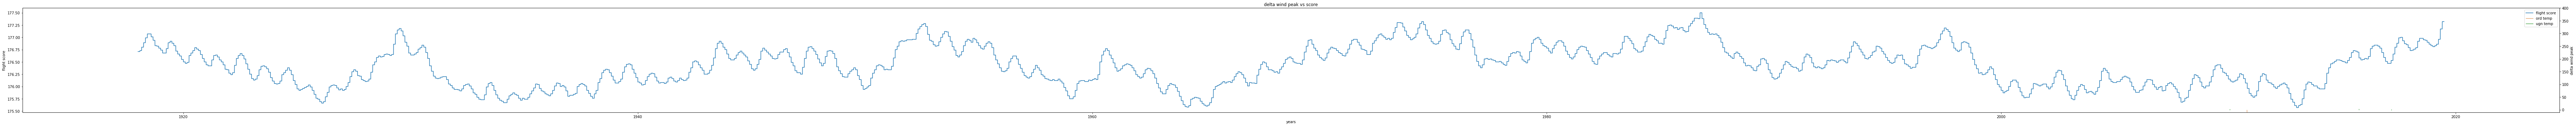

In [78]:
#plot the delta wind peak data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_peak_delta,color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_peak_delta,color = 'green',linewidth = 1, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta wind peak')
axes2.set_ylim([-10,400])
axes1.title.set_text('delta wind peak vs score')
fig.tight_layout()
fig.savefig('delta_windpeak_visulization.png')
fig.show()

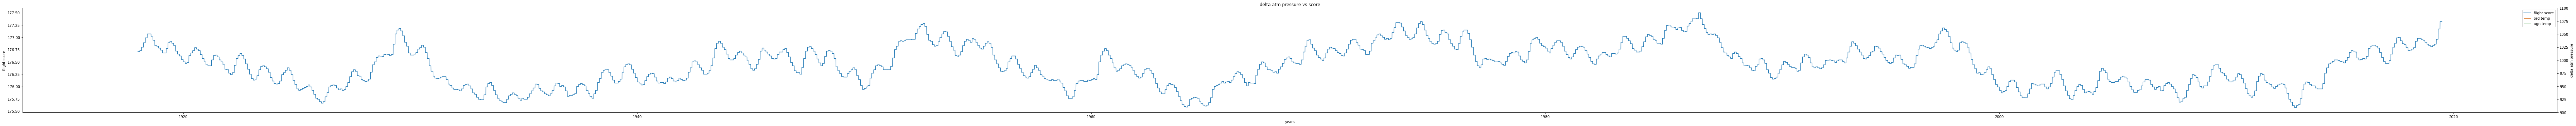

In [79]:
#plot the delta atm pressure data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_atm_delta,color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_atm_delta,color = 'green',linewidth = 1, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta atm pressure')
axes2.set_ylim([900,1100])
axes1.title.set_text('delta atm pressure vs score')
fig.tight_layout()
fig.savefig('delta_atmpressure_visulization.png')
fig.show()

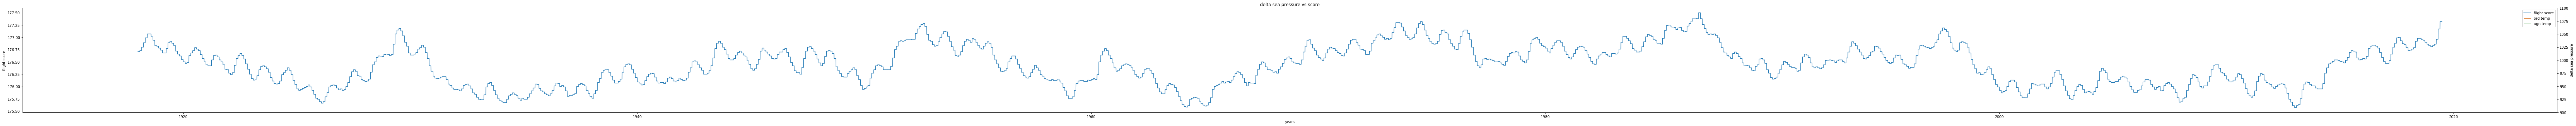

In [80]:
#plot the delta sea pressure data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_sea_delta,color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_sea_delta,color = 'green',linewidth = 1, label = 'ugn temp')
#axes2.plot(noh_date_list, noh_data['Tmean'],color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta sea pressure')
axes2.set_ylim([900,1100])
axes1.title.set_text('delta sea pressure vs score')
fig.tight_layout()
fig.savefig('delta_seapressure_visulization.png')
fig.show()

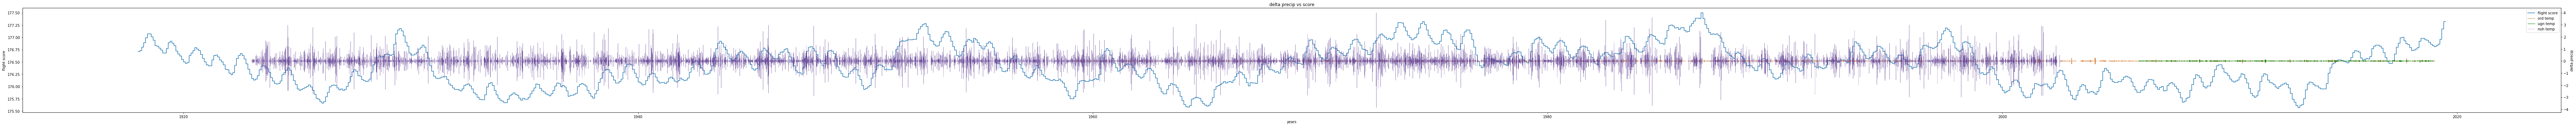

In [81]:
#plot the delta precip data and the score
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(100)
axes1=fig.add_subplot(111)
axes1.plot(date_list, daily_score, label = 'flight score')
axes1.set_xlabel('years')
axes1.set_ylabel('flight score')

axes2 = axes1.twinx()
axes2.plot(ord_date_list, ord_precip_delta,color = '#DA7C30',linewidth = 1, label = 'ord temp')
axes2.plot(ugn_date_list, ugn_precip_delta,color = 'green',linewidth = 1, label = 'ugn temp')
axes2.plot(noh_date_list, noh_precip_delta,color = '#6B4C9A',linewidth = 0.4, label = 'noh temp')
h1, l1 = axes1.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes1.legend(h1+h2, l1+l2, loc=0)
axes2.set_ylabel('delta precip')
#axes2.set_ylim([900,1100])
axes1.title.set_text('delta precip vs score')
fig.tight_layout()
fig.savefig('delta_precip_visulization.png')
fig.show()